In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [6]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [7]:
mensual_p = mensual['n_trips']

In [8]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [9]:
mensual_p = mensual_p.reset_index()

In [10]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [29]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=18, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/5oasbwmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/43mmfl_s.json
02:06:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=64619', 'data', 'file=/tmp/tmpul_yn2ty/5oasbwmq.json', 'init=/tmp/tmpul_yn2ty/43mmfl_s.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modely42u9pjv/prophet_model-20241119020614_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=64619', 'data', 'file=/tmp/tmpul_yn2ty/5oasbwmq.json', 'init=/tmp/tmpul_yn2ty/43mmfl_s.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modely42u9pjv/prophet_model-20241119020614_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:06:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=64619', 'data', 'file=/tmp/tmpul_yn2ty/5oasbwmq.json', 'init=/tmp/tmpul_yn2ty/43mmfl_s.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modely42u9pjv/prophet_model-20241119020614_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_modely42u9pjv/prophet_model-20241119020614_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_modely42u9pjv/prophet_model-20241119020614_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [30]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.831031e+06,2.974395e+06,3.187090e+06,2.770553e+06,2.881533e+06,245815.726870,179526.406901,315233.869659,245815.726870,179526.406901,315233.869659,0.0,0.0,0.0,3.076847e+06
1,2022-04-30,2.816717e+06,2.874653e+06,3.076085e+06,2.762007e+06,2.863936e+06,157859.155113,95710.408598,226366.159607,157859.155113,95710.408598,226366.159607,0.0,0.0,0.0,2.974576e+06
2,2022-05-31,2.801254e+06,2.926534e+06,3.119219e+06,2.755313e+06,2.845083e+06,223452.650668,162052.060217,281285.405124,223452.650668,162052.060217,281285.405124,0.0,0.0,0.0,3.024707e+06
3,2022-06-30,2.787105e+06,2.822183e+06,3.016967e+06,2.742231e+06,2.830210e+06,131633.352718,74910.560310,193280.325495,131633.352718,74910.560310,193280.325495,0.0,0.0,0.0,2.918739e+06
4,2022-07-31,2.772742e+06,2.499193e+06,2.700111e+06,2.727475e+06,2.814636e+06,-173365.920649,-234856.703504,-113264.776715,-173365.920649,-234856.703504,-113264.776715,0.0,0.0,0.0,2.599376e+06
5,2022-08-31,2.756457e+06,2.440278e+06,2.632149e+06,2.708850e+06,2.799023e+06,-218749.557653,-278854.712514,-156241.773217,-218749.557653,-278854.712514,-156241.773217,0.0,0.0,0.0,2.537707e+06
6,2022-09-30,2.738588e+06,2.407820e+06,2.632993e+06,2.694396e+06,2.785411e+06,-213563.053319,-295750.320104,-136799.266733,-213563.053319,-295750.320104,-136799.266733,0.0,0.0,0.0,2.525025e+06
7,2022-10-31,2.718664e+06,2.867481e+06,3.084940e+06,2.674043e+06,2.768474e+06,258231.227848,184315.377558,341250.795706,258231.227848,184315.377558,341250.795706,0.0,0.0,0.0,2.976895e+06
8,2022-11-30,2.697577e+06,2.525751e+06,2.744030e+06,2.653993e+06,2.750544e+06,-60267.066584,-124606.703495,5070.613866,-60267.066584,-124606.703495,5070.613866,0.0,0.0,0.0,2.637310e+06
9,2022-12-31,2.674908e+06,2.595623e+06,2.828189e+06,2.626138e+06,2.735023e+06,40641.735614,-39134.715634,133499.575881,40641.735614,-39134.715634,133499.575881,0.0,0.0,0.0,2.715550e+06


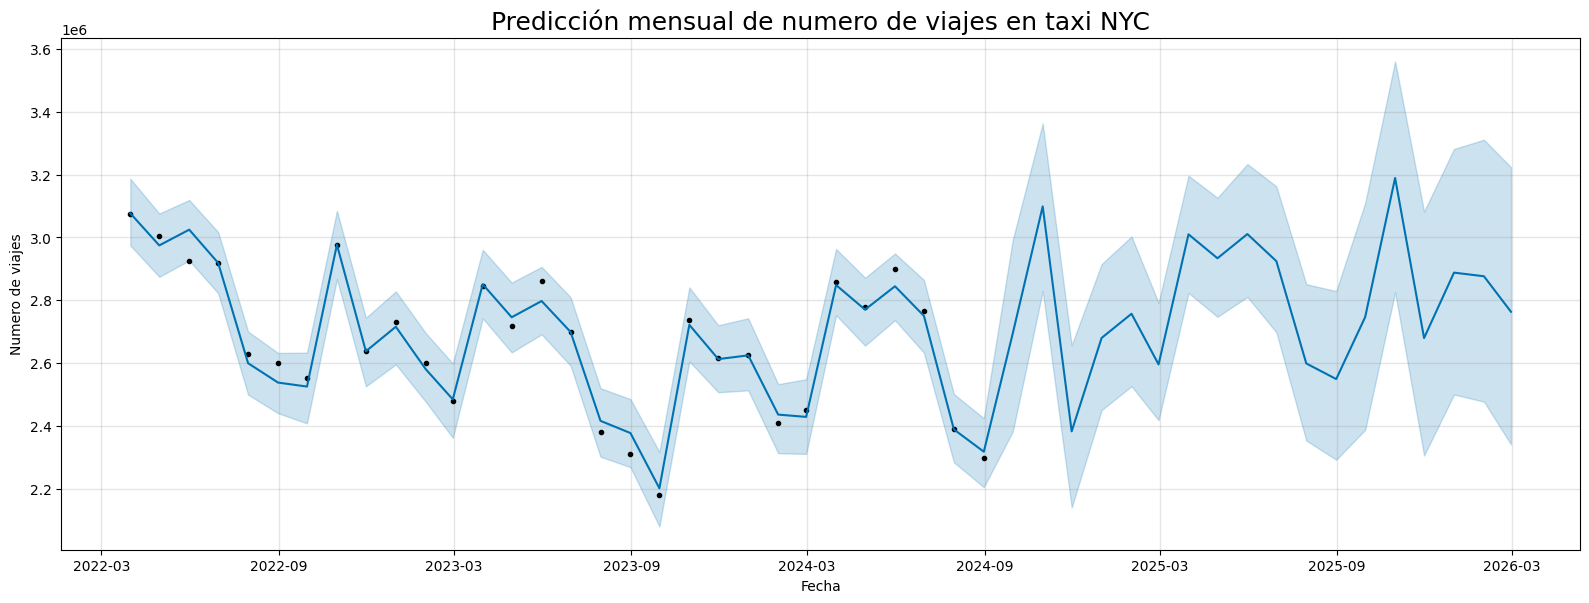

In [31]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

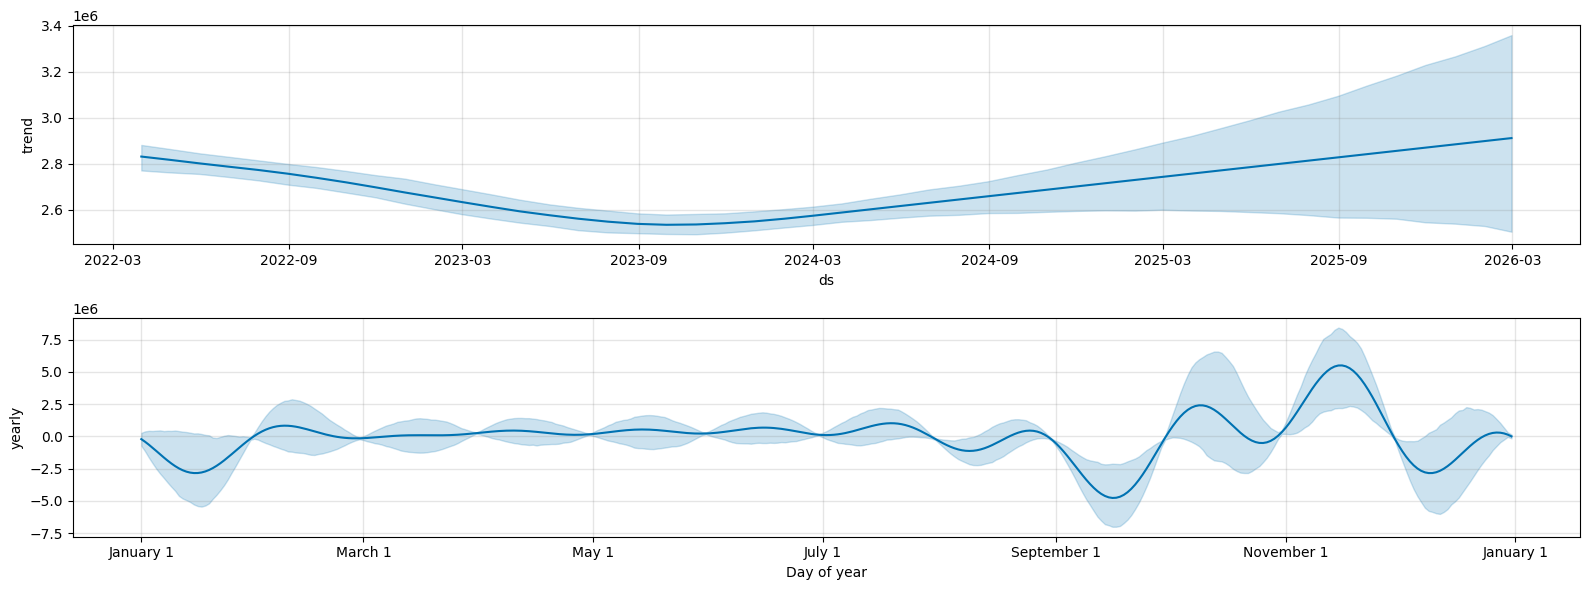

In [32]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [33]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [34]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/gy9wro4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/td8gv71v.json
02:06:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=87623', 'data', 'file=/tmp/tmpul_yn2ty/gy9wro4m.json', 'init=/tmp/tmpul_yn2ty/td8gv71v.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_model0jyxkghx/prophet_model-20241119020617_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=87623', 'data', 'file=/tmp/tmpul_yn2ty/gy9wro4m.json', 'init=/tmp/tmpul_yn2ty/td8gv71v.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_model0jyxkghx/prophet_model-20241119020617_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:06:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=87623', 'data', 'file=/tmp/tmpul_yn2ty/gy9wro4m.json', 'init=/tmp/tmpul_yn2ty/td8gv71v.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_model0jyxkghx/prophet_model-20241119020617_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_model0jyxkghx/prophet_model-20241119020617_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_model0jyxkghx/prophet_model-20241119020617_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [35]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.383837e+06,1.997352e+06,2.723778e+06,2179200,2023-09-01
1,2023-10-31,2.794450e+06,2.438352e+06,3.190595e+06,2736389,2023-09-01
2,2023-11-30,2.435020e+06,2.059651e+06,2.786138e+06,2616757,2023-09-01
3,2023-12-31,2.522536e+06,2.186983e+06,2.870954e+06,2625768,2023-09-01
4,2024-01-31,2.410649e+06,2.040273e+06,2.753041e+06,2409342,2023-09-01
5,2024-02-29,2.349501e+06,1.524111e+06,3.277576e+06,2448952,2023-09-01
6,2024-03-31,2.652746e+06,2.136859e+06,3.140301e+06,2858661,2023-09-01
7,2024-04-30,2.680682e+06,2.252201e+06,3.145047e+06,2777362,2023-09-01
8,2024-05-31,2.302912e+06,1.862178e+06,2.788558e+06,2899539,2023-09-01
9,2024-06-30,2.513884e+06,1.969297e+06,3.038633e+06,2767032,2023-09-01


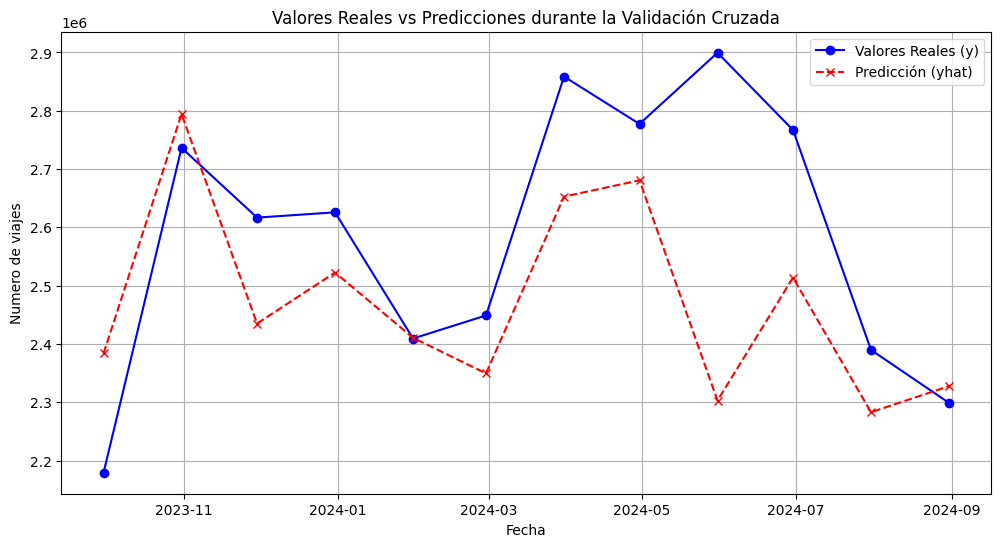

In [36]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


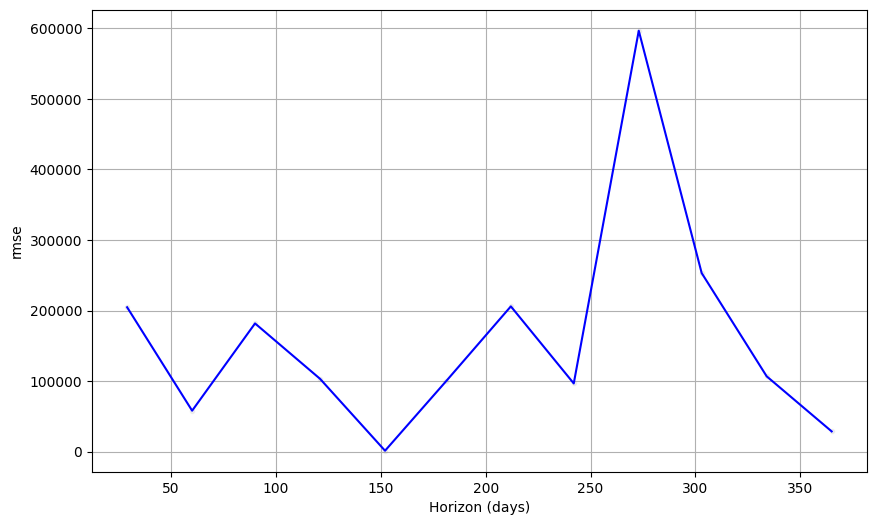

In [37]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [38]:
df_p_1 = performance_metrics(df_cv_1)

In [39]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 161354.62484986472


In [40]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 161354.62484986472


In [41]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [42]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.060524524586428964


In [43]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,4.857025e+10,161354.624850,161354.624850,0.060525,0.060525,0.063185,0.916667
std,109 days 20:33:46.987269072,9.889900e+10,156791.482614,156791.482614,0.054431,0.054431,0.060273,0.288675
min,29 days 00:00:00,1.709462e+06,1307.463806,1307.463806,0.000543,0.000543,0.000543,0.000000
25%,113 days 06:00:00,7.853052e+09,87025.322328,87025.322328,0.031412,0.031412,0.031819,1.000000
50%,196 days 12:00:00,1.102799e+10,104999.369987,104999.369987,0.042643,0.042643,0.043575,1.000000
75%,280 days 12:00:00,4.200765e+10,204956.921436,204956.921436,0.076896,0.076896,0.078466,1.000000
max,365 days 00:00:00,3.559636e+11,596626.880554,596626.880554,0.205766,0.205766,0.229364,1.000000


In [44]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,4.857025e+10,220386.599477,161354.62485,0.060525,0.042643,0.063185,0.916667


In [45]:
forecast_1.to_csv('forecast_mensual.csv')